# Statistics Dataset
### In this dataset im going to perfom some  statistics, like:
* Descriptive statistics
    * Mean
    * Median
    * Rango
    * STD
    * Variance

In [1]:
import pandas as pd

data=pd.read_csv('Crime_R.csv')
#lets visualize the first values
print(data.head())
#shape of the dataframe
print("This dataframe has",data.shape[0],"columns and", data.shape[1],"rows.")


   CrimeRate  Youth  Southern  Education  ExpenditureYear0  LabourForce  \
0       45.5    135         0       12.4                69          540   
1       52.3    140         0       10.9                55          535   
2       56.6    157         1       11.2                47          512   
3       60.3    139         1       11.9                46          480   
4       64.2    126         0       12.2               106          599   

   Males  MoreMales  StateSize  YouthUnemployment  ...  ExpenditureYear10  \
0    965          0          6                 80  ...                 71   
1   1045          1          6                135  ...                 54   
2    962          0         22                 97  ...                 44   
3    968          0         19                135  ...                 41   
4    989          0         40                 78  ...                 97   

   LabourForce10  Males10  MoreMales10  StateSize10  YouthUnemploy10  \
0            5

## Descriptive Statistics

In [2]:
print(data.describe())

        CrimeRate       Youth   Southern  Education  ExpenditureYear0  \
count   47.000000   47.000000  47.000000  47.000000         47.000000   
mean   102.808511  138.574468   0.340426  12.391489         85.000000   
std     28.893266   12.567634   0.478975   1.120332         29.718974   
min     45.500000  119.000000   0.000000  10.000000         45.000000   
25%     82.700000  130.000000   0.000000  11.550000         62.500000   
50%    103.000000  136.000000   0.000000  12.400000         78.000000   
75%    120.650000  146.000000   1.000000  13.200000        104.500000   
max    161.800000  177.000000   1.000000  15.100000        166.000000   

       LabourForce        Males  MoreMales   StateSize  YouthUnemployment  \
count    47.000000    47.000000  47.000000   47.000000          47.000000   
mean    561.191489   983.021277   0.191489   36.617021          95.468085   
std      40.411814    29.467365   0.397727   38.071188          18.028783   
min     480.000000   934.000000   

In [3]:
data.var()

CrimeRate               834.820796
Youth                   157.945421
Southern                  0.229417
Education                 1.255143
ExpenditureYear0        883.217391
LabourForce            1633.114709
Males                   868.325624
MoreMales                 0.158187
StateSize              1449.415356
YouthUnemployment       325.037003
MatureUnemployment       71.325624
HighYouthUnemploy         0.222017
Wage                   9310.502313
BelowWage              1591.695652
CrimeRate10            1542.766920
Youth10                 119.123959
Education10               1.371952
ExpenditureYear10       781.835338
LabourForce10          1417.167438
Males10                 890.765957
MoreMales10               0.171138
StateSize10            1559.518039
YouthUnemploy10         318.382979
MatureUnemploy10         70.801110
HighYouthUnemploy10       0.246068
Wage10                 8789.018501
BelowWage10            1502.041628
dtype: float64

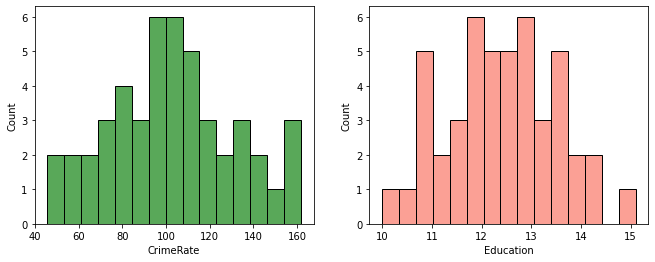

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
sns.histplot(data=data, x='CrimeRate',bins=15, color='forestgreen',ax=axes[0])
sns.histplot(data=data, x='Education',bins=15, color='salmon',ax=axes[1])
plt.show()

[]

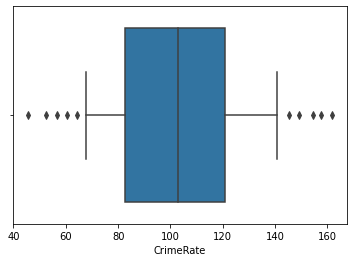

In [5]:
sns.boxplot(data=data, x='CrimeRate', whis=[10,90] )
plt.plot()

In [6]:
# calculate the probability of cancer patient and diagnostic test

# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


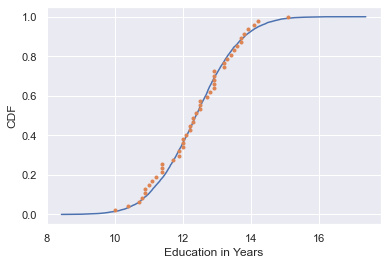

In [43]:
import numpy as np

data_ed=data['Education']    
mean=np.mean(data_ed)
std=np.std(data_ed)                                  #steps to create the normal data
samples=np.random.normal(mean, std, size=10000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

x, y =ecdf(data_ed)
x_norm, y_norm=ecdf(samples)

sns.set()
plt.plot(x_norm,y_norm)
plt.plot(x,y,marker='.', linestyle='none')
plt.xlabel('Education in Years')
plt.ylabel('CDF')
plt.show()
